In [ ]:
!pip install -r requirements.txt 

In [6]:
import sys 

sys.path.insert(1, 'My_libs/')

import IDmeter
import importlib
importlib.reload(IDmeter)

import Plot_figures
import importlib
importlib.reload(Plot_figures)

import Download_data
import importlib
importlib.reload(Download_data)

import collections
import numpy as np

# Panel 1

In the following code we reproduce Figs. 1A, B, C of the main text of our article titled "The intrinsic dimension of gene expression during cell differentiation".

# Zebrafish embryogenesis Wagner

The original dataset is available on GEO repository (GSE112294).

We concatenated the counts matrices corresponding to 7 developmental stages (4-6-8-10-14-18-24 hours 
post-fertilization). 

### Download data

In [7]:
dataset_name = "ZebraEmbryo_Wagner"
data_file_path = 'Data/'
data_file_name = 'ZebrafishEmbryo_Wagner_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to ZEBRAFISH EMBRYOGENESIS WAGNER dataset!
scRNA-seq data in a counts matrix cells x genes with shape ((36749, 30677))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['stage', 'celltype', 'cell'], dtype='object'))

Quality control on cells...

Genes selection...
Selecting 14059 protein-coding genes
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((36749, 14059))


### ID measure

In [8]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'08hpf': 3568, '14hpf': 4001, '04hpf': 4277, '10hpf': 4280, '06hpf': 5692, '18hpf': 6962, '24hpf': 7969}
From each stage we will sub-sample 2676 cells


In [9]:
dataset_name = "ZebraEmbryo_Wagner"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset ZebraEmbryo_Wagner
Time-based grouping of cells
Labels: ['04hpf' '06hpf' '08hpf' '10hpf' '14hpf' '18hpf' '24hpf']
3 independent sub-samplings
Counts matrix dimension=(36749, 14059)


Subsampling number 1 , with seed: 306777. 04hpf ID = 68.6 - 06hpf ID = 66.1 - 08hpf ID = 54.4 - 10hpf ID = 52.2 - 14hpf ID = 50.9 - 18hpf ID = 41.1 - 24hpf ID = 39.2 - 


Subsampling number 2 , with seed: 320349. 04hpf ID = 89.9 - 06hpf ID = 59.3 - 08hpf ID = 54.0 - 10hpf ID = 43.7 - 14hpf ID = 48.2 - 18hpf ID = 40.6 - 24hpf ID = 39.9 - 


Subsampling number 3 , with seed: 910970. 04hpf ID = 93.2 - 06hpf ID = 61.1 - 08hpf ID = 56.8 - 10hpf ID = 47.9 - 14hpf ID = 50.7 - 18hpf ID = 39.3 - 24hpf ID = 41.0 - 



### Plot

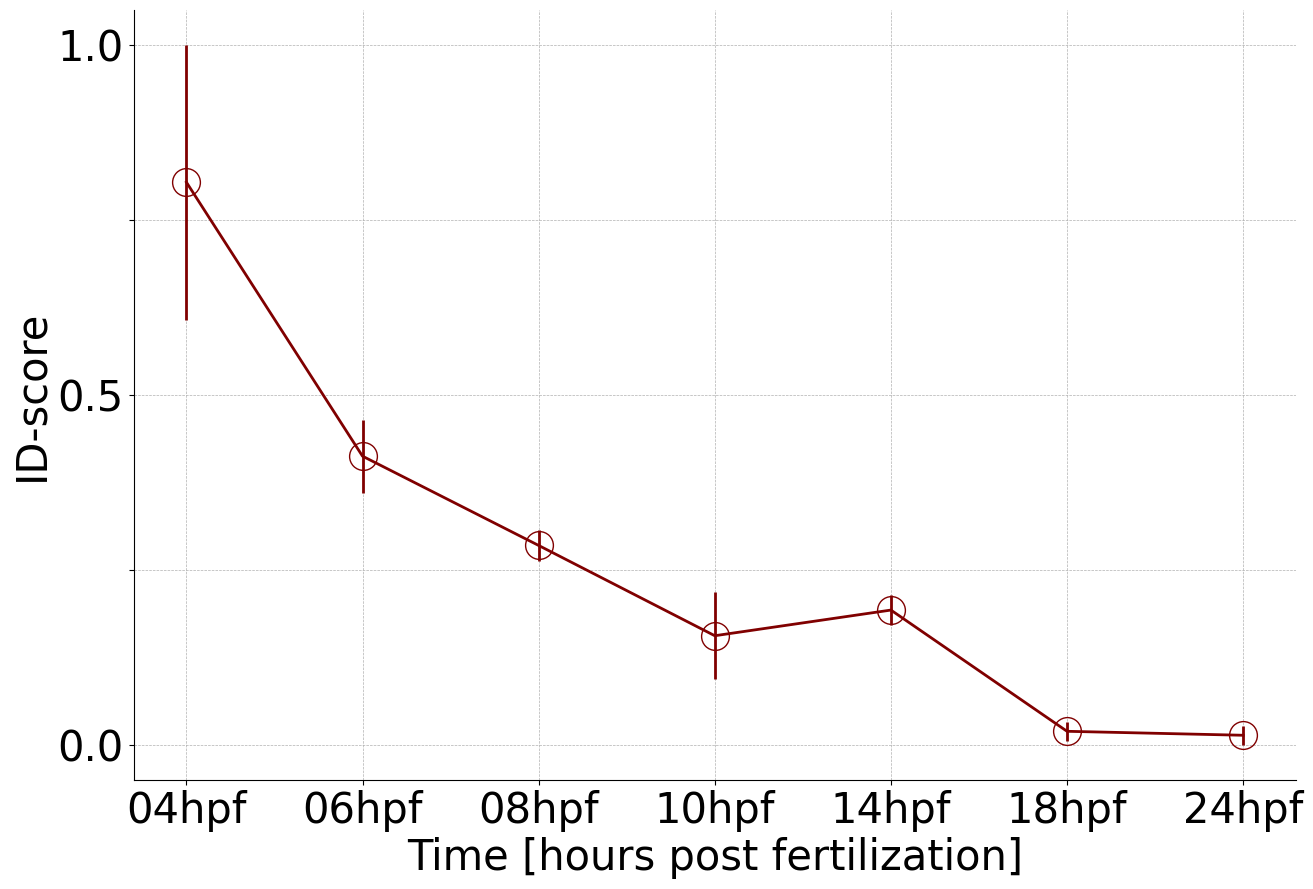

In [10]:
xlabel = f'{labeling} [hours post fertilization]'
Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel)

# Elegans embryogenesis

The original dataset is available on GEO repository (GSE126954).

From the metadata they supply, we took the column named "embryo.time.bin" and renamed it *stage* in *adata.obs*.

### Download data

In [11]:
dataset_name = "ElegansEmbryo"
data_file_path = 'Data/'
data_file_name = 'Elegans_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to ELEGANS EMBRYOGENESIS dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


scRNA-seq data in a counts matrix cells x genes with shape ((89701, 20222))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['stage', 'passed_initial_QC_or_later_whitelisted', 'cell'], dtype='object'))

Quality control on cells...
Deletion of 3677 cells that did not pass the quality-control of the authors

Genes selection...
Selecting 19027 protein-coding genes
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((86024, 18000))


### ID measure

In [12]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'< 100': 458, '100-130': 462, '130-170': 1507, '> 650': 2916, '580-650': 4416, '510-580': 4447, '170-210': 6498, '450-510': 8423, '210-270': 10926, '390-450': 12089, '330-390': 16445, '270-330': 17437}
From each stage we will sub-sample 343 cells


In [13]:
dataset_name = "ElegansEmbryo"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset ElegansEmbryo
Time-based grouping of cells
Labels: ['330-390' '210-270' '270-330' '170-210' '390-450' '< 100' '450-510'
 '> 650' '510-580' '130-170' '580-650' '100-130']
3 independent sub-samplings
Counts matrix dimension=(86024, 18000)


Subsampling number 1 , with seed: 825308. 330-390 ID = 12.2 - 210-270 ID = 16.2 - 270-330 ID = 14.7 - 170-210 ID = 17.1 - 390-450 ID = 15.5 - < 100 ID = 25.5 - 450-510 ID = 13.1 - > 650 ID = 13.2 - 510-580 ID = 8.5 - 130-170 ID = 20.4 - 580-650 ID = 9.3 - 100-130 ID = 22.9 - 


Subsampling number 2 , with seed: 428343. 330-390 ID = 12.2 - 210-270 ID = 16.7 - 270-330 ID = 15.3 - 170-210 ID = 18.7 - 390-450 ID = 15.9 - < 100 ID = 23.3 - 450-510 ID = 13.3 - > 650 ID = 11.1 - 510-580 ID = 11.0 - 130-170 ID = 17.9 - 580-650 ID = 8.6 - 100-130 ID = 24.5 - 


Subsampling number 3 , with seed: 373352. 330-390 ID = 13.0 - 210-270 ID = 14.3 - 270-330 ID = 15.9 - 170-210 ID = 19.1 - 390-450 ID = 14.6 - < 100 ID = 23.1 - 450-510 ID = 13.1 - > 65

### Plot

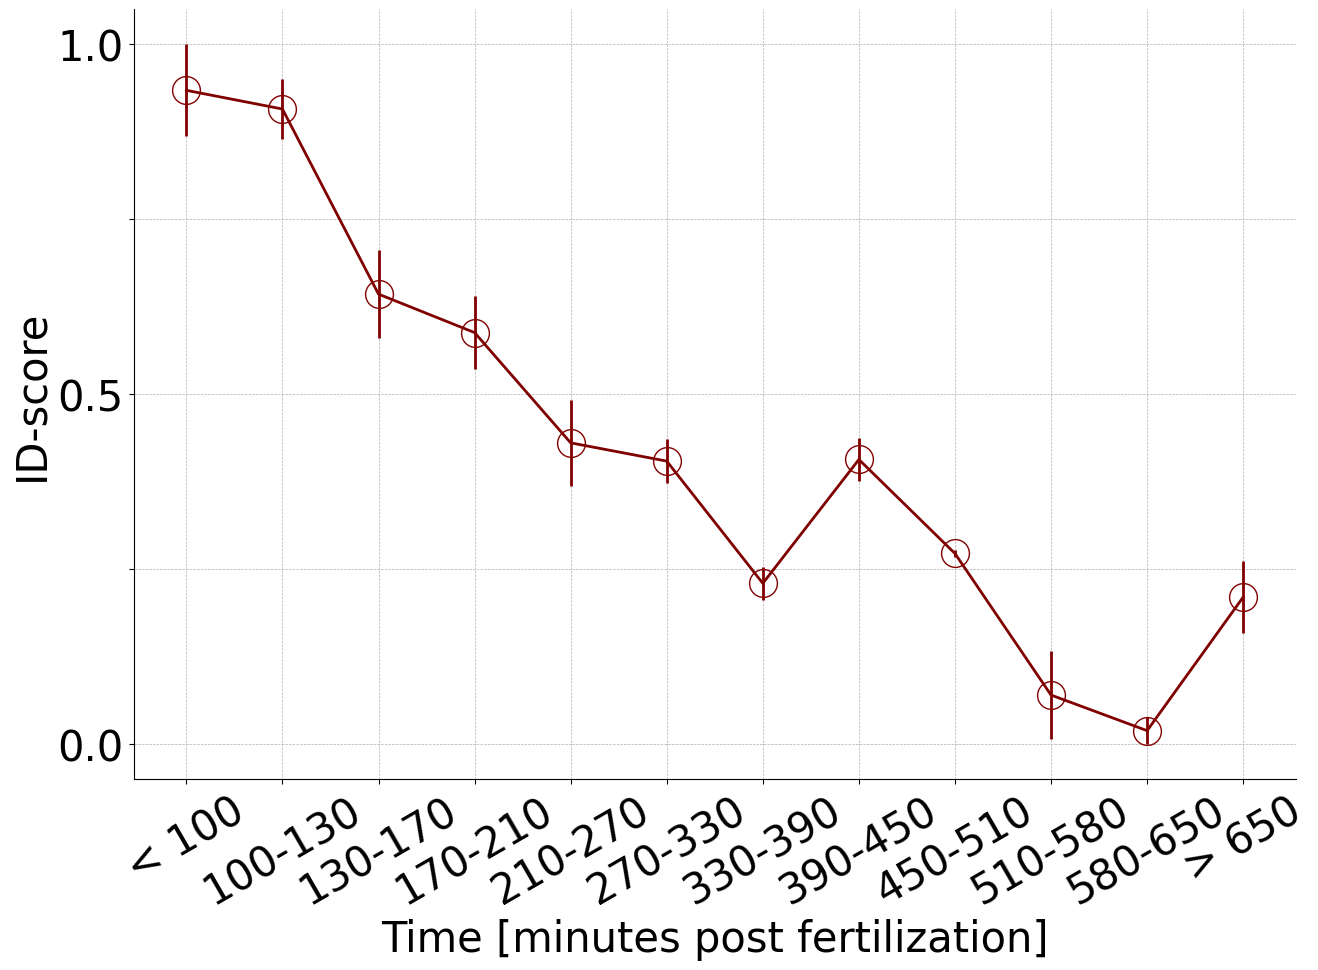

In [20]:
xlabel = f'{labeling} [minutes post fertilization]'
x_ordering = np.array(['< 100', '100-130', '130-170', '170-210', '210-270', 
                       '270-330', '330-390', '390-450', '450-510', '510-580', 
                       '580-650', '> 650'])
plot_params = {"figsize": (15, 10),
            "label_size": 30,
            "markersize": 20,
            "linewidth": 2,
            "xlabel_rotation": 30}

Plot_figures.plot_temporal_trend(results_dict, dataset_name, 
                                 xlabel, x_ordering, 
                                 plot_params = plot_params)

# Mouse gastrulation and early organogenesis

The original dataset is available on E-MTAB repository (6967).

From the metadata they supply, we took the column named "stage" and we stored it in *adata.obs*. For this study, we only considered one biological sample (the most represented) per stage: the information about that is in the attribute 'sample' of the original dataset.

### Data download

In [21]:
dataset_name = "MouseGastrulation"
data_file_path = 'Data/'
data_file_name = 'MouseGastrulation_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to MOUSE GASTRULATION dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


scRNA-seq data in a counts matrix cells x genes with shape ((139331, 29452))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['stage', 'celltype', 'sample', 'doublet', 'cell'], dtype='object'))
Dropping cells with nan values in metadata

Cleaning meta data...

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 1000 expressed genes were deleted (0) deleted
 - cells with mitochondrial gene-expression fractions greater than 2.37% were deleted (18)

Genes selection...
Selecting 19150 protein-coding genes
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((108839, 17502))


### ID measure

In [22]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("The less represented stage has", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'E6.75': 2075, 'E6.5': 3484, 'E7.5': 10992, 'E7.25': 13537, 'E7.75': 14487, 'E7.0': 14748, 'E8.25': 15934, 'E8.0': 16677, 'E8.5': 16905}
The less represented stage has 1556 cells


It must be considered that the number above is referred to cells coming from every biological sample. If we only consider one sample per stage this value drops to 1530 cells, that corresponds to the size of our sub-samplings.

In [23]:
dataset_name = "MouseGastrulation"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MouseGastrulation
Time-based grouping of cells
Labels: ['E6.5' 'E7.5' 'E6.75' 'E7.75' 'E7.0' 'E8.0' 'E8.5' 'E7.25' 'E8.25']
3 independent sub-samplings
Counts matrix dimension=(108839, 17502)


Subsampling number 1 , with seed: 819814. E6.5 ID = 57.2 - E7.5 ID = 44.3 - E6.75 ID = 59.0 - E7.75 ID = 39.1 - E7.0 ID = 45.8 - E8.0 ID = 41.3 - E8.5 ID = 34.3 - E7.25 ID = 49.1 - E8.25 ID = 42.6 - 


Subsampling number 2 , with seed: 314947. E6.5 ID = 56.9 - E7.5 ID = 46.9 - E6.75 ID = 55.4 - E7.75 ID = 38.6 - E7.0 ID = 52.6 - E8.0 ID = 43.9 - E8.5 ID = 35.3 - E7.25 ID = 44.3 - E8.25 ID = 41.6 - 


Subsampling number 3 , with seed: 750820. E6.5 ID = 60.3 - E7.5 ID = 51.9 - E6.75 ID = 58.7 - E7.75 ID = 41.5 - E7.0 ID = 50.9 - E8.0 ID = 43.6 - E8.5 ID = 34.4 - E7.25 ID = 47.6 - E8.25 ID = 45.2 - 



### Plot

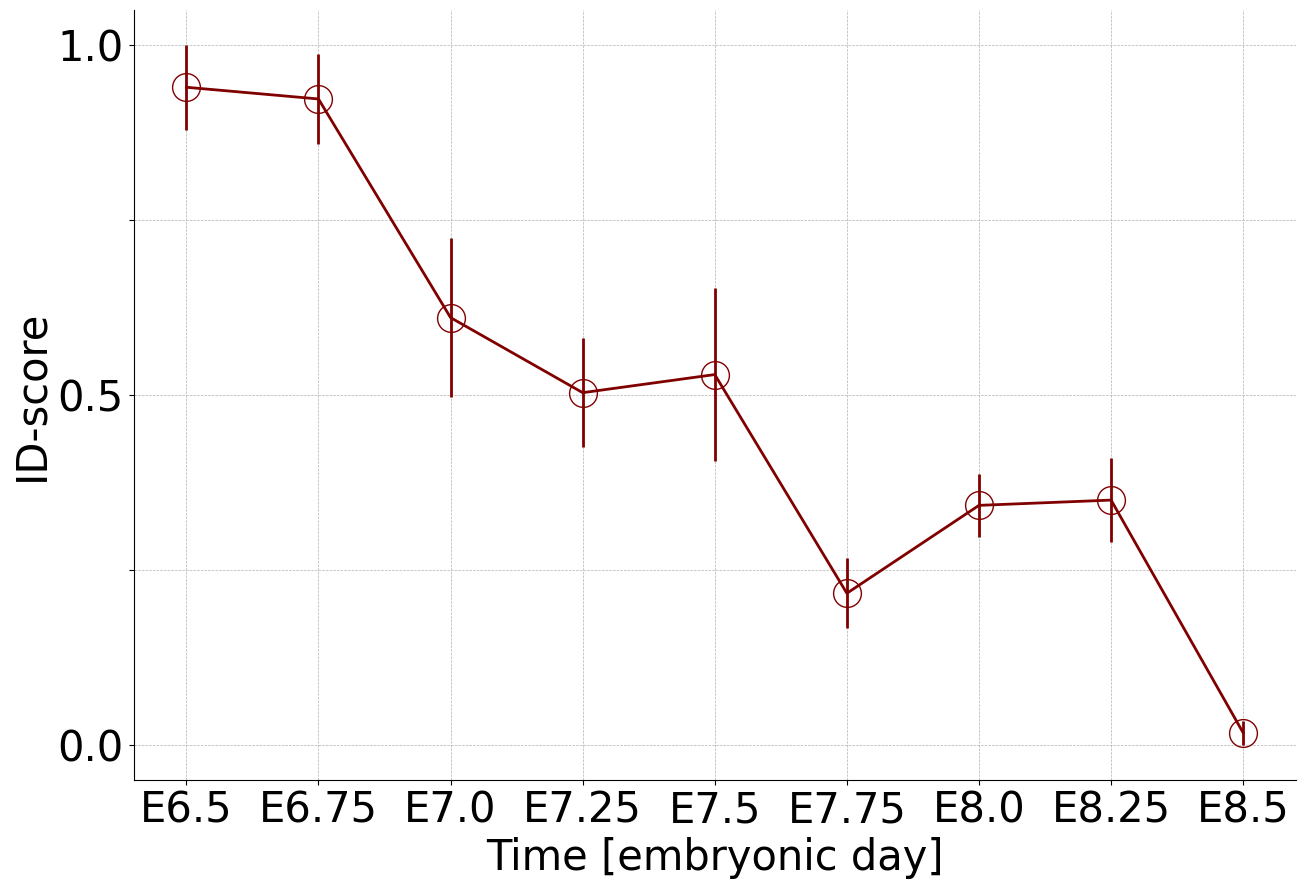

In [24]:
xlabel = f'{labeling} [embryonic day]'
x_ordering = np.sort(results_dict['Mean trend']['Labels'])

Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel, x_ordering)